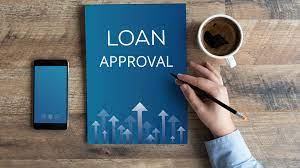

#**Context:**

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

**Problem Statement:**

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

#Know Your Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#df = pd.read_csv('/kaggle/input/loantap-logisticregression/logistic_regression.csv') #try
df=pd.read_csv('logistic_regression.csv')

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

**Data Dictionary:**

1. loan_amnt: Amount borrower applied for.
2. term: Loan duration (36 or 60 months).
3. int_rate: Interest rate on loan.
4. installment: Monthly repayment amount.
5. grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
6. sub_grade: LoanTap assigned loan grade (Risk ratings by LoanTap.)
7. emp_title: Borrower's job title.
8. emp_length: Duration of borrower's employment (0-10 years).
9. home_ownership: Borrower's housing situation (own, rent, etc.).
10. annual_inc: Borrower's yearly income.
11. verification_status: Whether borrower's income was verified.
12. issue_d: Loan issuance month.
13. loan_status: Current status of the loan.
14. purpose: Borrower's reason for the loan.
15. title: The loan's title provided by the borrower.
16. dti (Debt-to-Income ratio): Monthly debt vs. monthly income ratio.
17. earliest_cr_line: Date of borrower's oldest credit account.
18. open_acc: Number of borrower's active credit lines.
19. pub_rec: Negative records on borrower's public credit profile.
20. revol_bal: Total credit balance.
21. revol_util: Usage percentage of 'revolving' accounts like credit cards.
22. total_acc: Total number of borrower's credit lines.
23. initial_list_status: Loan's first category ('W' or 'F').
24. application_type: Individual or joint application.
25. mort_acc: Number of borrower's mortgages.
26. pub_rec_bankruptcies: Bankruptcy records for borrower.
27. Address: Borrower's location.

Observations:

1. There are 396030 rows and 27 columns
2. Data contains some missing values
3. Data will require some preprocessing like handling null values, outliers, data types...etc which will be taken care in the following section

#Data Preprocessing

- Data Cleaning (Null Values / Duplicates / Outlier Treatment)
- Feature Engineering
- Data Type Conversion

In [ ]:
df1=df.copy()

In [ ]:
# Non-numeric columns
obj_cols = df1.select_dtypes(include='object').columns
obj_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
for _ in obj_cols:
    print()
    print(f'Total Unique Values in {_} column are :- {df1[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {df1[_].value_counts(normalize=True)}')
    print()
    print('-'*120)


Total Unique Values in term column are :- 2
Value counts in term column are :-
 term
 36 months    0.762581
 60 months    0.237419
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in grade column are :- 7
Value counts in grade column are :-
 grade
B    0.292953
C    0.267624
A    0.162076
D    0.160402
E    0.079509
F    0.029725
G    0.007712
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in sub_grade column are :- 35
Value counts in sub_grade column are :-
 sub_grade
B3    0.067306
B4    0.064644
C1    0.059748
C2    0.057016
B2    0.056801
B5    0.055766
C3    0.053584
C4    0.051208
B1    0.048436
A5    0.046779
C5    0.046067
D1    0.040383
A4    0.039868
D2    0.035227
D3    0.030864
D4    0.029435
A3    0.026705
A1    0.024566

In [ ]:
# Numeric columns
num_cols = df1.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
for _ in num_cols:
    print()
    print(f'Total Unique Values in {_} column are :- {df1[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {df1[_].value_counts(normalize=True)}')
    print()
    print('-'*120)


Total Unique Values in loan_amnt column are :- 1397
Value counts in loan_amnt column are :-
 loan_amnt
10000.0    0.069863
12000.0    0.053950
15000.0    0.050256
20000.0    0.047898
35000.0    0.036805
             ...   
36225.0    0.000003
950.0      0.000003
37800.0    0.000003
30050.0    0.000003
725.0      0.000003
Name: proportion, Length: 1397, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in int_rate column are :- 566
Value counts in int_rate column are :-
 int_rate
10.99    0.031339
12.99    0.024321
15.61    0.023609
11.99    0.021670
8.90     0.020248
           ...   
14.28    0.000003
18.72    0.000003
18.36    0.000003
30.84    0.000003
24.59    0.000003
Name: proportion, Length: 566, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in installment colum

**Converting to Required Data Types**

In [ ]:
#Convert employment length to numeric
d = {'10+ years':10, '4 years':4, '< 1 year':0,
     '6 years':6, '9 years':9,'2 years':2, '3 years':3,
     '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df1['emp_length']=df1['emp_length'].replace(d)

In [ ]:
# Convert earliest credit line & issue date to datetime
df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'])
df1['issue_d'] = pd.to_datetime(df1['issue_d'])

<ipython-input-11-dfb40b390eec>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['earliest_cr_line'] = pd.to_datetime(df1['earliest_cr_line'])
<ipython-input-11-dfb40b390eec>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['issue_d'] = pd.to_datetime(df1['issue_d'])


In [ ]:
#Convert columns with less number of unique values to categorical columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df1[cat_cols] = df1[cat_cols].astype('category')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  float64       
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

**Feature Engineering / Handling Missing Values**

 Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies

In [ ]:
#Mean aggregation of mort_acc by total_acc to fill missing values

avg_mort = df1.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [ ]:
df1['mort_acc'] = df1.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1

In [ ]:
df1['pub_rec']=df1.pub_rec.apply(pub_rec)
df1['mort_acc']=df1.mort_acc.apply(mort_acc)
df1['pub_rec_bankruptcies']=df1.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [ ]:
df1['issue_d_year']=df1['issue_d'].dt.year

Deriving Zip Code and State from Address

In [ ]:
# Deriving zip code and state from address
df1[['state', 'zip_code']] = df1['address'].apply(lambda x: pd.Series([x[-8:-6], x[-5:]]))

In [ ]:
#Drop address
df1.drop(["address"], axis = 1, inplace=True)

In [ ]:
df1['zip_code'].nunique()

10

In [ ]:
df1['zip_code'] = df1['zip_code'].astype('category')

In [ ]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df1.fillna(value=fill_values, inplace=True)

In [ ]:
df1.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                       0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
issue_d_year                0
state                       0
zip_code                    0
dtype: int64

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.shape

(376929, 29)

**Check for Duplicate Values**

In [ ]:
df1.duplicated().any()

False

No Duplicate Records Observed

**Outlier Treatment**

In [ ]:
import seaborn as sns

In [ ]:
num_cols = df1.select_dtypes(include='number')

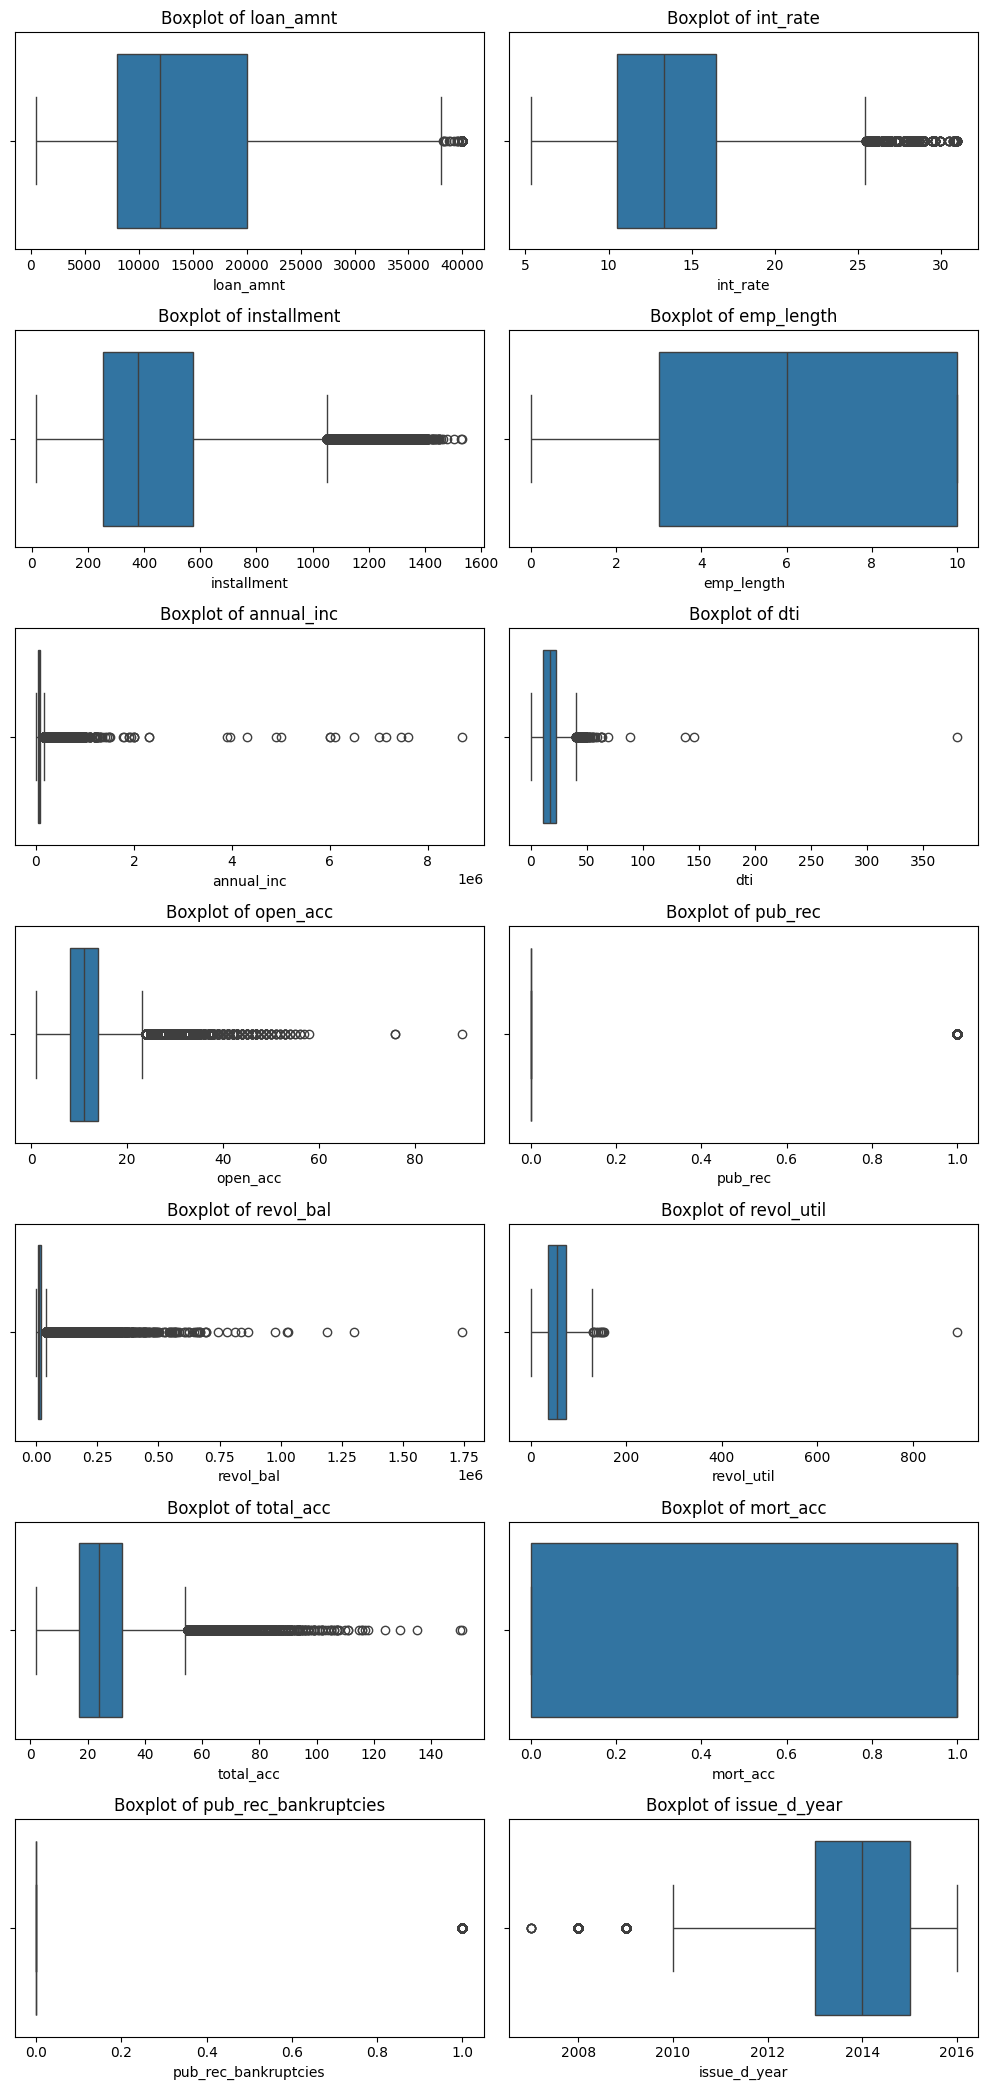

In [ ]:
fig = plt.figure(figsize=(10,21))
i=1
for col in num_cols:
  ax = plt.subplot(7,2,i)
  sns.boxplot(x=df1[col])
  plt.title(f'Boxplot of {col}')
  i += 1

plt.tight_layout()
plt.show()

In [ ]:
num_cols.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'issue_d_year'],
      dtype='object')

Removing columns 'pub_rec_bankruptcies','pub_rec','mort_acc' from outlier treatment since they are categorical in nature now

In [ ]:
newnum_cols=['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']

In [ ]:
for col in newnum_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df1 = df1[(df1[col] >= lower) & (df1[col] <= upper)]

In [ ]:
df1.shape

(318371, 29)

Removed Outliers using IQR so that they do not distort model stability and accuracy

# Exploratory Data Analysis

- Correlation
- Univariate
- Bivariate

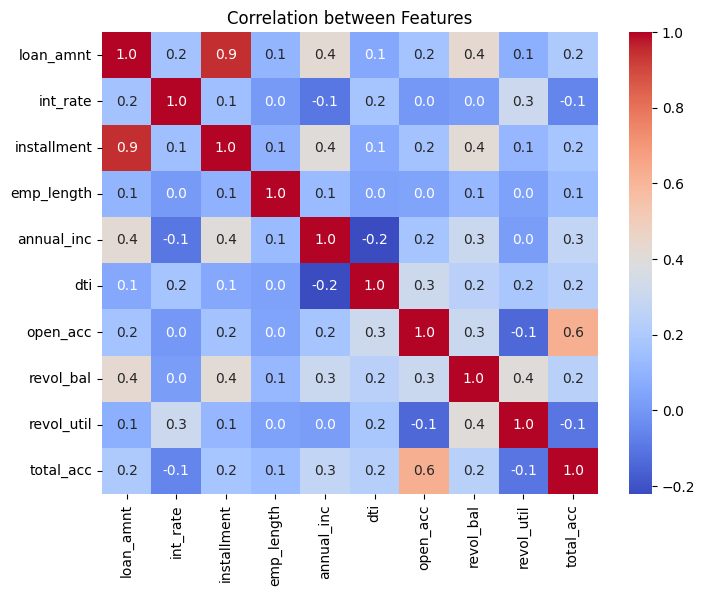

In [ ]:
#Correlation between numerical features
plt.figure(figsize=(8,6))
sns.heatmap(df1[newnum_cols].corr(), annot=True, fmt=".1f",cmap='coolwarm')
plt.title('Correlation between Features')
plt.show()

Observations:

1. installment and loan_amnt are almost perfectly positive correlated. So one of these can be removed for model building
2. total_acc and open_acc are moderately positive correlated

In [ ]:
#Drop installment
df1.drop(columns=['installment'], inplace=True)

Distribution of Variables

In [ ]:
newcat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','pub_rec','issue_d_year',
            'initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']

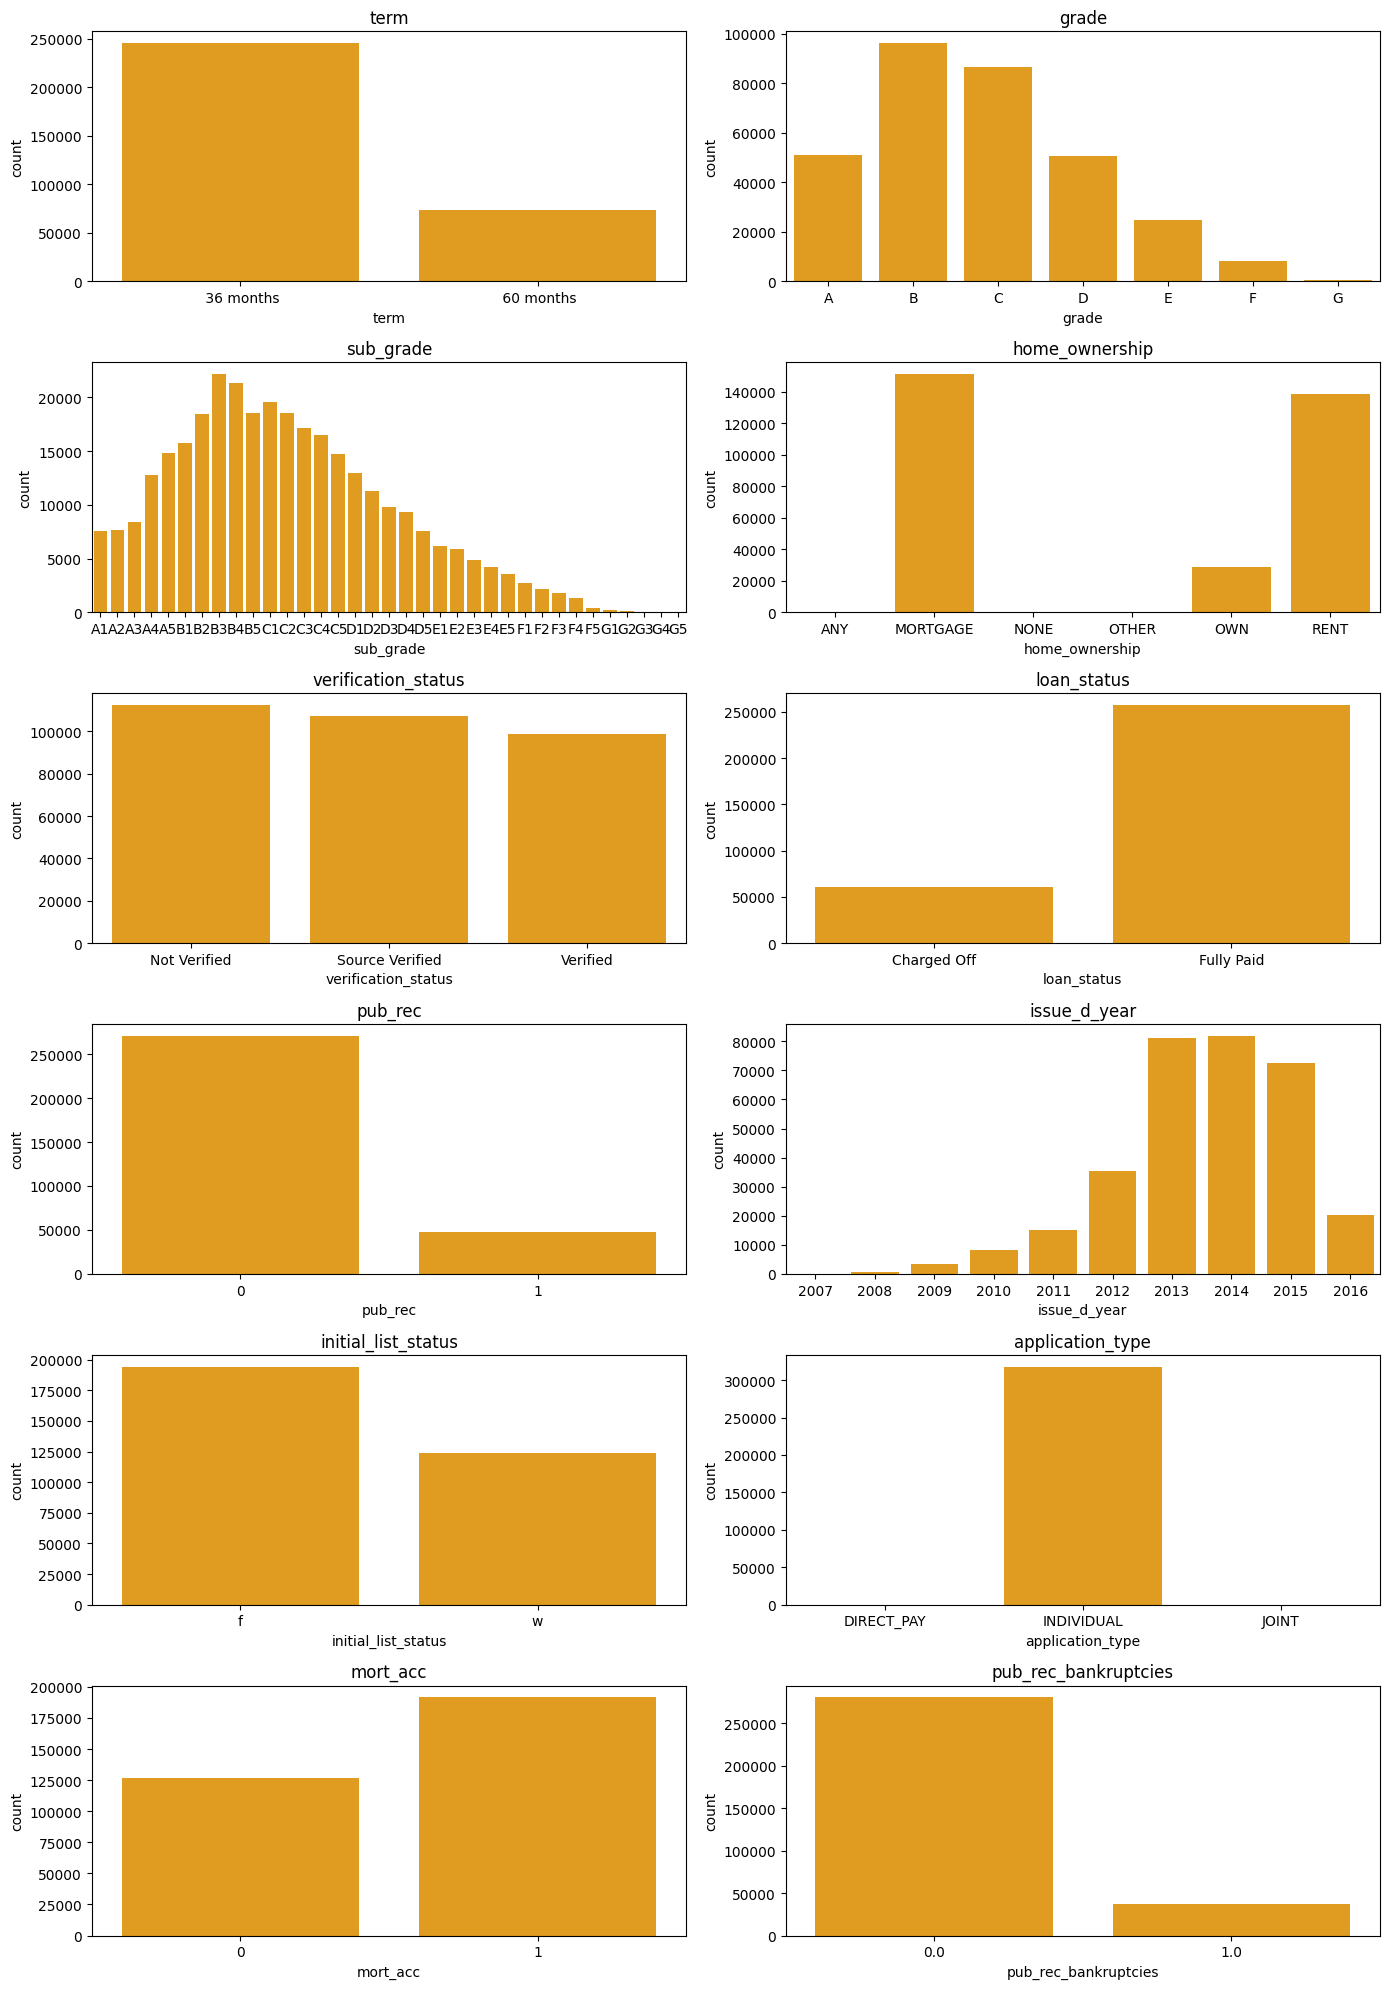

In [ ]:
plt.figure(figsize=(14,20))
i=1
for col in newcat_cols:
  ax=plt.subplot(6,2,i)
  sns.countplot(x=df1[col],color='orange')
  plt.title(f'{col}')
  i += 1

plt.tight_layout()
plt.show()

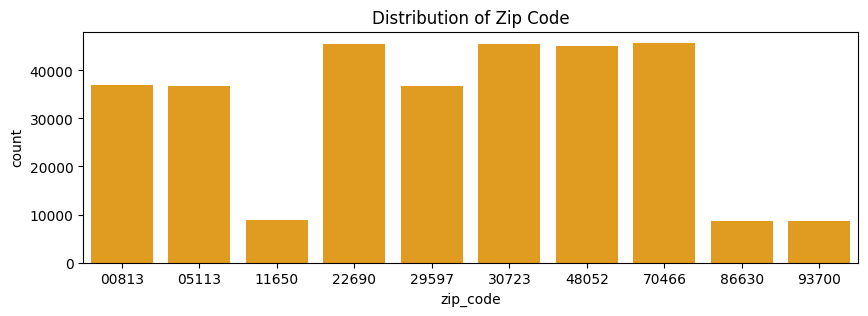

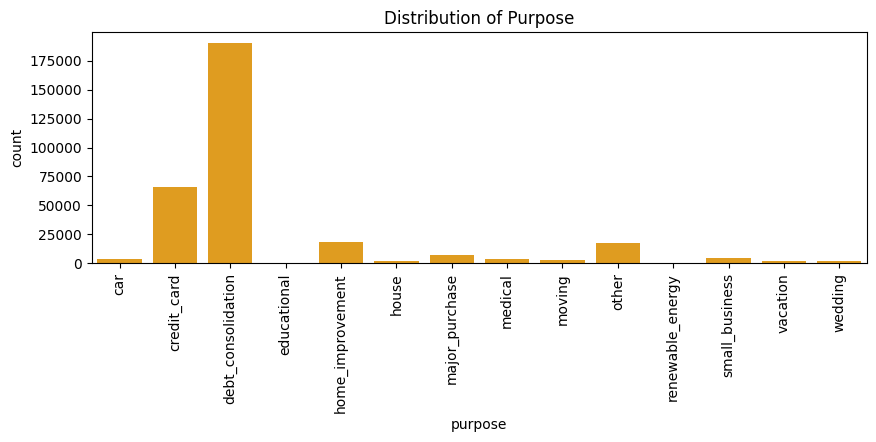

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(x=df1['zip_code'],color='orange')
plt.title('Distribution of Zip Code')

plt.figure(figsize=(10,3))
sns.countplot(x=df1['purpose'],color='orange')
plt.xticks(rotation=90)
plt.title('Distribution of Purpose')

plt.show()

Observations:

- Approx. 80% of the loans are of 36 months duration
- Maximum Loans are from B grade followed by C,D,A
- Maximum Home Ownersip belong to MORTGAGE followed by RENT and OWN
- Fully Paid loans are almost 80% of the target variable loan_status
- Almost 90% of the applicants do not have derogatory Public Records
- Initial Listing Status of the loan is more in f category than w
- Almost 99% of the application types are individual
- Most of the applicants have got Mortage Account
- Almost 90% of the applicant have no Public Record Bankrupcies
- Almost 55% of the loans are taken against debt_consolidation followed by Credict card
- 2013 and 2014 were the years with maximum loans funding





**Impact of Categorical Columns on Loan Status**

In [ ]:
newcat1_cols = ['term', 'grade','sub_grade','home_ownership','emp_length',
            'verification_status','zip_code','pub_rec','issue_d_year',
            'initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']

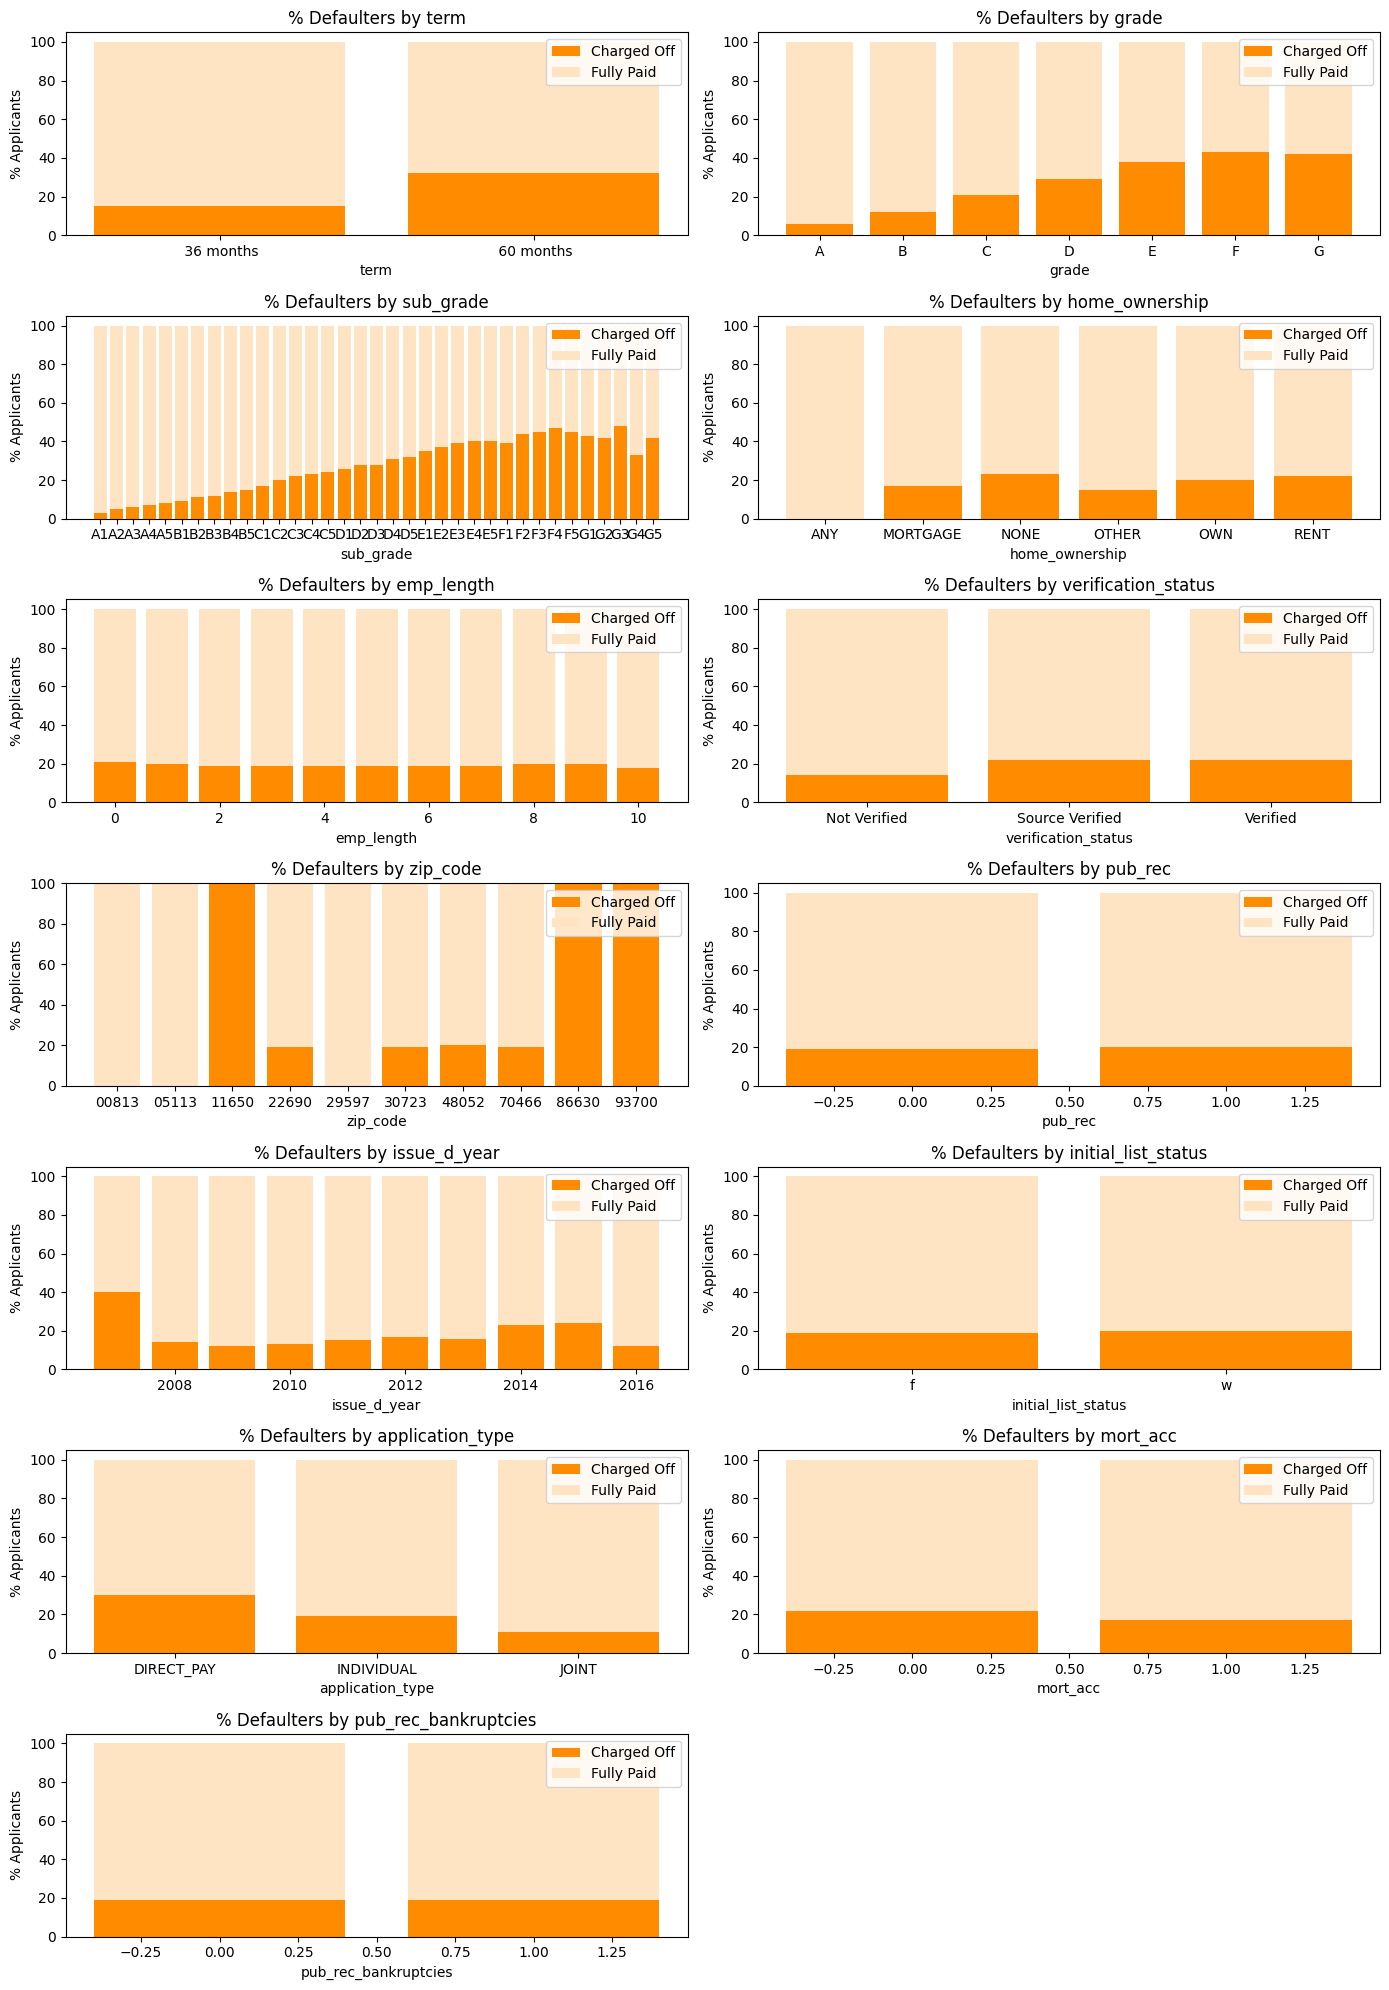

In [ ]:
plt.figure(figsize=(14,20))
i=1
for col in newcat1_cols:
  ax=plt.subplot(7,2,i)

  data = df1.pivot_table(index=col, columns='loan_status', aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='darkorange')
  plt.bar(data[col],data['Fully Paid'], color='bisque', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
  i += 1

plt.tight_layout()
plt.show()

Impact of Purpose and State on Loan Status

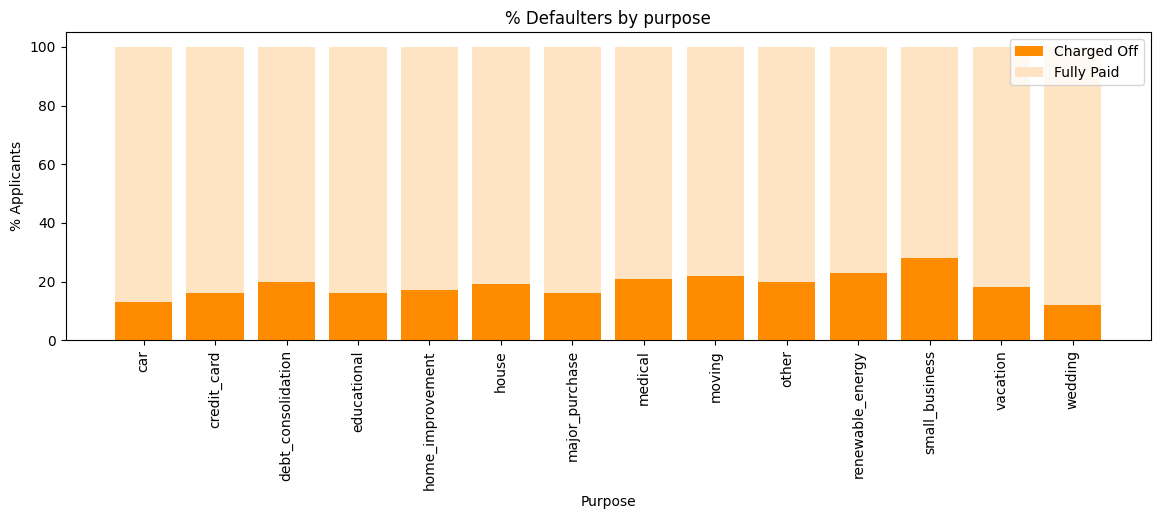

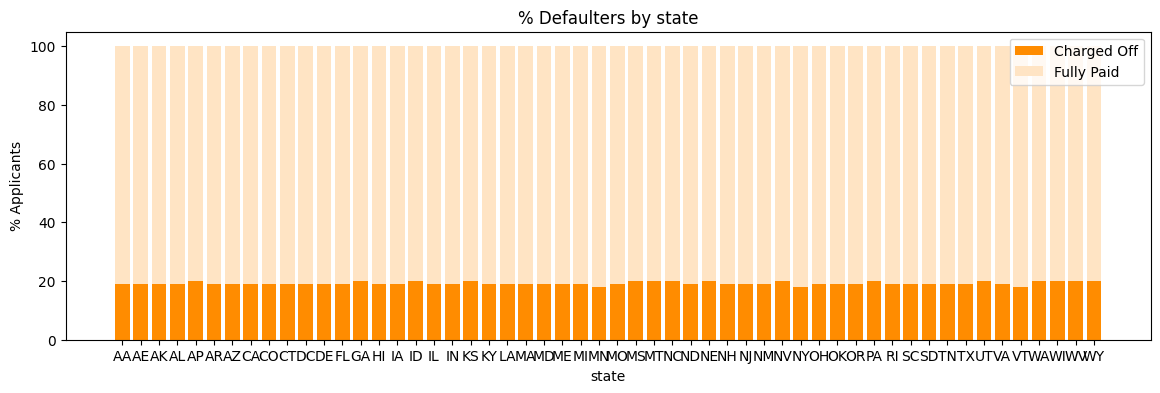

In [ ]:
purpose = df1.pivot_table(index='purpose', columns='loan_status', aggfunc='count', values='sub_grade')
purpose = purpose.div(purpose.sum(axis=1), axis=0).multiply(100).round()
purpose.reset_index(inplace=True)

plt.figure(figsize=(14,4))
plt.bar(purpose['purpose'],purpose['Charged Off'], color='darkorange')
plt.bar(purpose['purpose'],purpose['Fully Paid'], color='bisque', bottom=purpose['Charged Off'])
plt.xlabel('Purpose')
plt.ylabel('% Applicants')
plt.title('% Defaulters by purpose')
plt.legend(['Charged Off','Fully Paid'])
plt.xticks(rotation=90)
plt.show()

state = df1.pivot_table(index='state', columns='loan_status', aggfunc='count', values='sub_grade')
state = state.div(state.sum(axis=1), axis=0).multiply(100).round()
state.reset_index(inplace=True)

plt.figure(figsize=(14,4))
plt.bar(state['state'],state['Charged Off'], color='darkorange')
plt.bar(state['state'],state['Fully Paid'], color='bisque', bottom=state['Charged Off'])
plt.xlabel('state')
plt.ylabel('% Applicants')
plt.title('% Defaulters by state')
plt.legend(['Charged Off','Fully Paid'])
plt.show()

Observations:

- Percent share of default is much higher for long duration loans i.e 60 months
- Defaulters are highest for grade f and g and then decrease with grade. Sub-grade showing similar pattern
- Home Ownership: Charged-off % is high for None category followed by Rent, Own and Mortgage
- Surprisingly 100% defaulters observed for Zip codes 11650, 86630 and 93700. And zip codes with no defaulters at all are 00813, 05113, 29597
- pub_rec, pub_rec_bankruptcies, init_list_status and state have no impact
- In application type, Direct pay has maximum defaulters followed by individual and joint
- Applicants with mort_acc 0 have higher charged off % than ones with mort_acc category 1
- Applicants with small_business have high default rate followed by renewable energy and others
- No significant impact of employment length on loan repayments
- 2007 is the year with maximum percent of defaulters followed by 2015 and 2014

**Impact of Numerical Features on Loan Status**

In [ ]:
newnum1_cols=['loan_amnt', 'int_rate', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']

In [ ]:
import warnings
import matplotlib.colors as mcolors

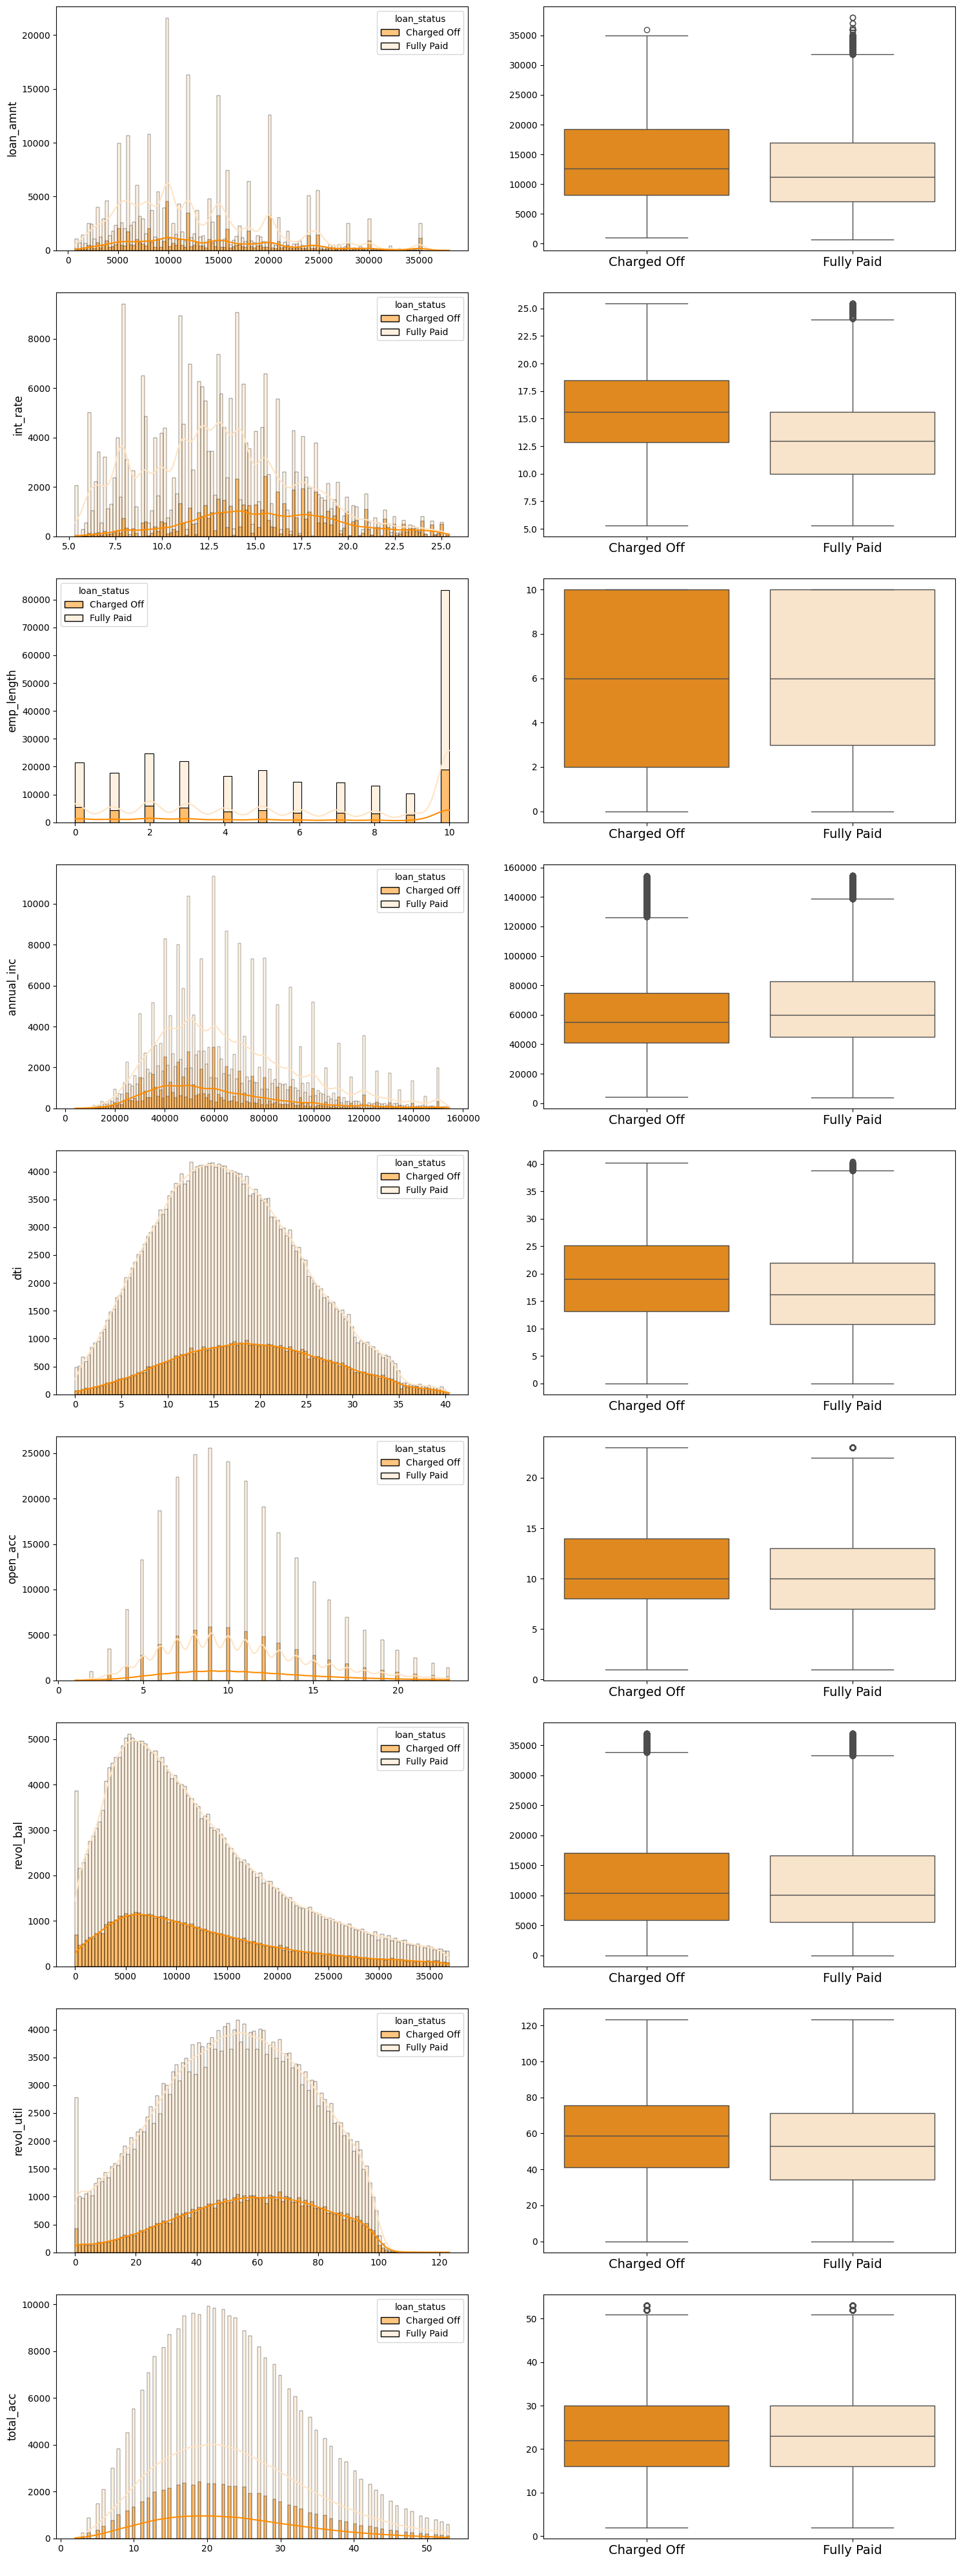

In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, ax = plt.subplots(9,2,figsize=(15,40))
i=0
color_dict = {'Fully Paid': mcolors.to_rgba('bisque', 0.5),
              'Charged Off': mcolors.to_rgba('darkorange', 1)}
for col in newnum1_cols:
    sns.boxplot(data=df1, y=col, x='loan_status', ax=ax[i,1],
               palette=('darkorange', 'bisque'))
    sns.histplot(data=df1, x=col, hue='loan_status', ax=ax[i, 0], legend=True,
                palette=color_dict, kde=True, fill=True)
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1

plt.tight_layout()
plt.show()

Observations:

- Loan amount, int_rate, dti and open_acc show almost normal distribution
- annual_inc, revol_bal, total_acc are right skewed
- revol_util is left skewed
- Mean loan_amount,int_rate, dti, open_acc, revol_util is slightly higher for charged off
- Mean annual_inc is lower for charged off than fully paid

**Basis above analysis, removing some features for further analysis and model building**

In [ ]:
# Remove columns which do not have an impact on loan_status
df1.drop(columns=['initial_list_status','state',
                 'emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade'], inplace=True)
# Removed issue_d since already extracted year from it and will be taken into account
# Removed sub_grade, grade is indicative of same and is part of analysis

In [ ]:
df1.drop(columns=['pub_rec','pub_rec_bankruptcies'], inplace=True)

**Part of Preprocessing**

In [ ]:
#Encoding Target Variable
df1['loan_status']=df1['loan_status'].map({'Fully Paid': 0, 'Charged Off':1}).astype(int)

In [ ]:
df1['term']=df1['term'].map({' 36 months': 36, ' 60 months':60}).astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318371 entries, 0 to 396029
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   loan_amnt            318371 non-null  float64 
 1   term                 318371 non-null  int64   
 2   int_rate             318371 non-null  float64 
 3   grade                318371 non-null  category
 4   emp_length           318371 non-null  float64 
 5   home_ownership       318371 non-null  category
 6   annual_inc           318371 non-null  float64 
 7   verification_status  318371 non-null  category
 8   loan_status          318371 non-null  int64   
 9   purpose              318371 non-null  category
 10  dti                  318371 non-null  float64 
 11  open_acc             318371 non-null  float64 
 12  revol_bal            318371 non-null  float64 
 13  revol_util           318371 non-null  float64 
 14  total_acc            318371 non-null  float64 
 15  appli

#Data Preparation for Modeling

- Encoding
- SMOTE
- Scaling

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
x = df1.drop(columns=['loan_status'])
x.reset_index(inplace=True, drop=True)
y = df1['loan_status']
y.reset_index(drop=True, inplace=True)

**One Hot Encoding Categorical Columns**

In [ ]:
cat_cols = x.select_dtypes('category').columns

encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(x[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
x = pd.concat([x,encoded_df], axis=1)
x.drop(columns=cat_cols, inplace=True)
x.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,...,zip_code_00813,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,10.0,117000.0,26.24,16.0,36369.0,41.8,25.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8000.0,36,11.99,4.0,65000.0,22.05,17.0,20131.0,53.3,27.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15600.0,36,10.49,0.0,43057.0,12.79,13.0,11987.0,92.2,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7200.0,36,6.49,6.0,54000.0,2.60,6.0,5472.0,21.5,13.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24375.0,60,17.27,9.0,55000.0,33.95,13.0,24584.0,69.8,43.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Train Test Split**

In [ ]:
# Split into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

**Check Class Imbalance**

In [ ]:
print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")

Before OverSampling, count of label 1: 36811
Before OverSampling, count of label 0: 154211


**SMOTE:**

(Synthetic Minority Over-sampling Technique) is often used to handle imbalanced datasets, especially when the target variable has significantly fewer instances of one class compared to the other. If our binary classification problem has an imbalanced target variable, applying SMOTE can help improve model performance by generating synthetic samples of the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(f"After OverSampling, count of label 1: {sum(y_train_resampled == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_train_resampled == 0)}")

After OverSampling, count of label 1: 154211
After OverSampling, count of label 0: 154211


**Scale Numerical Features**

We will perform standard scaling on Numerical features and keep intact One hot encoded features and not perform scaling on them.

Scaling binary variables can make them harder to interpret. In many cases, the binary nature of these variables is crucial for understanding their meaning in the context of the data. Distorting this binary nature can lead to misinterpretations of the data

In [ ]:
numerical_columns=['loan_amnt', 'term', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'issue_d_year']

In [ ]:
scaler = StandardScaler()

# Fit the scaler on the resampled training numerical features
scaler.fit(X_train_resampled[numerical_columns])

# Scale the numerical features in the resampled training set
X_train_scaled_numeric = scaler.transform(X_train_resampled[numerical_columns])
# Scale the numerical features in the validation and test sets
X_val_scaled_numeric = scaler.transform(X_val[numerical_columns])
X_test_scaled_numeric = scaler.transform(X_test[numerical_columns])

# Convert scaled numerical features back to DataFrame to align indices
X_train_scaled_numeric_df = pd.DataFrame(X_train_scaled_numeric, columns=numerical_columns, index=X_train_resampled.index)
X_val_scaled_numeric_df = pd.DataFrame(X_val_scaled_numeric, columns=numerical_columns, index=X_val.index)
X_test_scaled_numeric_df = pd.DataFrame(X_test_scaled_numeric, columns=numerical_columns, index=X_test.index)

In [ ]:
#Concatenate Scaled Numerical Features with One-Hot Encoded Features:
X_train_non_numeric = X_train_resampled.drop(columns=numerical_columns)
X_val_non_numeric = X_val.drop(columns=numerical_columns)
X_test_non_numeric = X_test.drop(columns=numerical_columns)

X_train_final = pd.concat([X_train_non_numeric.reset_index(drop=True), X_train_scaled_numeric_df.reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_non_numeric.reset_index(drop=True), X_val_scaled_numeric_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_non_numeric.reset_index(drop=True), X_test_scaled_numeric_df.reset_index(drop=True)], axis=1)

In [ ]:
X_train_final.head()

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,...,int_rate,emp_length,annual_inc,dti,open_acc,revol_bal,revol_util,total_acc,mort_acc,issue_d_year
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.656132,-0.241089,0.424903,-2.328082,0.071498,-1.460465,-2.411266,1.305726,1.021892,-2.567030
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.157262,-0.241089,0.789670,-1.250205,0.320259,0.827063,1.105705,0.679894,1.021892,-0.359957
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.740010,0.636958,0.716717,-0.720356,-0.923544,-0.793701,0.996346,0.992810,-0.978577,-0.359957
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.646831,1.222323,0.315473,-0.129472,0.569019,0.758748,-0.661529,-0.363160,1.021892,0.375734
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.476781,1.222323,1.409774,1.187357,0.569019,2.444935,1.691866,0.158367,-0.978577,-1.095648


In [ ]:
X_train_final.shape

(308422, 55)

In [ ]:
X_test_final.shape

(63675, 55)

In [ ]:
X_val_final.shape

(63674, 55)

#Logistic Regression Model

- Build the Model
- Tune the Model
- Hyperparameter grid for C (inverse of regularization strength)
- Use GridSearchCV to find the best hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


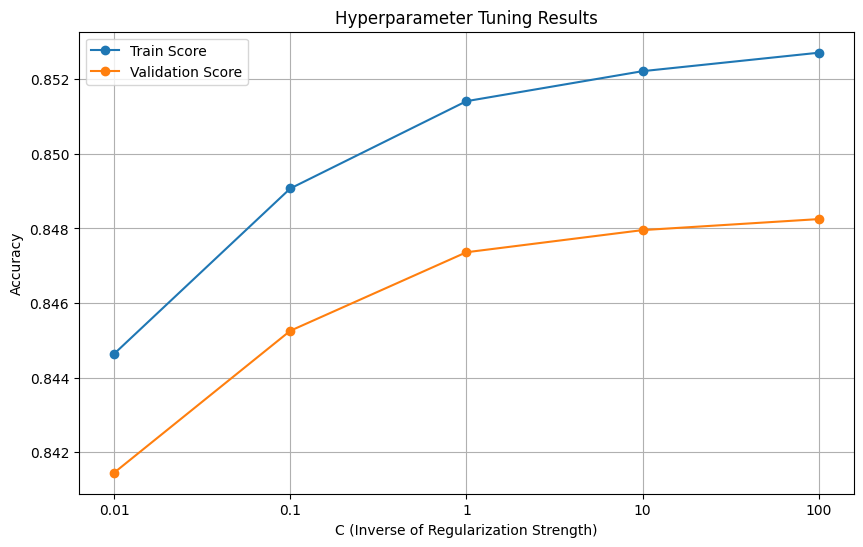

In [ ]:
model = LogisticRegression(max_iter=1000)

# Define the hyperparameter grid for C (inverse of regularization strength)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, return_train_score=True,n_jobs=-1)
grid_search.fit(X_train_final, y_train_resampled)

# Extract mean validation scores for each value of C
results = pd.DataFrame(grid_search.cv_results_)
mean_train_scores = results['mean_train_score']
mean_val_scores = results['mean_test_score']
params = [str(param) for param in param_grid['C']]

plt.figure(figsize=(10, 6))
plt.plot(params, mean_train_scores, marker='o', label='Train Score')
plt.plot(params, mean_val_scores, marker='o', label='Validation Score')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Hyperparameter Tuning Results')
plt.legend()
plt.grid(True)
plt.show()


In the above plot it is clearly observed that the accuracy of the model is highest with Hyperparameter C=100.

If we try to tune it further with values w.r.t 100 we can increase accuracy of the model further

In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on the validation set (Optional, just for reference)
val_score = best_model.score(X_val_final, y_val)
print(f'Validation Score: {val_score}')

Validation Score: 0.8453685962873386


In [ ]:
#Evaluate on train set
train_score = best_model.score(X_train_final, y_train_resampled)
print(f'Train Score: {train_score}')

Train Score: 0.8521603517258821


In [ ]:
# Evaluate on the test set
test_score = best_model.score(X_test_final, y_test)
print(f'Test Score: {test_score}')

Test Score: 0.8438162544169612


Observations:

- The training score is the highest, which is expected since the model is trained on this data.
- The validation score is slightly lower than the training score, which is also expected but close, indicating good generalization.
- The test score is slightly lower than both the training and validation scores but still close, indicating that the model generalizes reasonably well to unseen data.

#Confusion Matrix

In [ ]:
from sklearn.metrics import (accuracy_score, confusion_matrix,
                             roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_final)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[45519  6037]
 [ 3908  8211]]


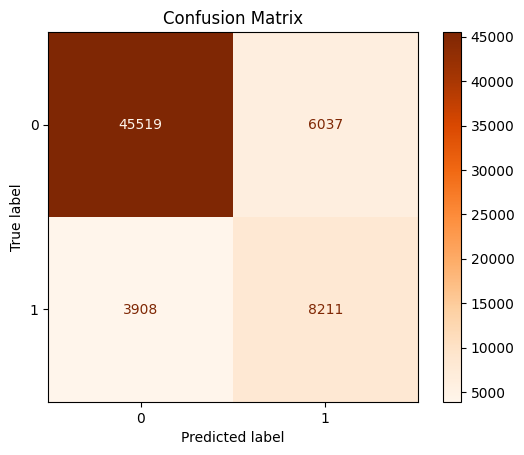

In [ ]:
disp = ConfusionMatrixDisplay(conf_matrix)
cmap = plt.cm.Oranges
disp.plot(cmap=cmap)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     51556
           1       0.58      0.68      0.62     12119

    accuracy                           0.84     63675
   macro avg       0.75      0.78      0.76     63675
weighted avg       0.86      0.84      0.85     63675



Observations:

Precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. In this context:

- Precision for class 0: 0.92 means that out of all instances predicted as class 0, 92% of them were actually class 0.
- Precision for class 1: 0.58 means that out of all instances predicted as class 1, only 58% of them were actually class 1.

Recall (Sensitivity): Recall is the ratio of true positive predictions to the total number of actual positive instances in the data. In this context:

- Recall for class 0: 0.88 means that the model correctly identified 88% of all actual class 0 instances.
- Recall for class 1: 0.68 means that the model correctly identified 68% of all actual class 1 instances.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. In this context:

- F1-score for class 0: 0.90 is the harmonic mean of precision and recall for class 0.
- F1-score for class 1: 0.62 is the harmonic mean of precision and recall for class 1.

#Trade Off Analysis

The underwriting process for personal loans at LoanTap involves critical trade-offs between detecting genuine defaulters and avoiding false positives. Here are the key points to consider:

**False Positives vs. False Negatives:**

False Positives: Approving a loan for a potentially risky borrower. This could lead to non-performing assets (NPAs), which increase financial risk and loss.

False Negatives: Denying a loan to a creditworthy borrower. This results in lost revenue opportunities and a potential decrease in customer satisfaction.

#Interpreting Model Coefficients

In [ ]:
# Extract coefficients and map them to feature names
coefficients = best_model.coef_[0]
feature_names = X_train_final.columns

# Display coefficients with feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
print(coefficients_df)

                                Feature  Coefficient
35                       zip_code_11650   107.329827
42                       zip_code_93700   105.994906
41                       zip_code_86630   105.407643
31          application_type_INDIVIDUAL     5.352844
14  verification_status_Source Verified     4.763543
32               application_type_JOINT     4.625648
15         verification_status_Verified     4.561012
13     verification_status_Not Verified     4.474550
30          application_type_DIRECT_PAY     3.820612
9                   home_ownership_NONE     3.568933
10                 home_ownership_OTHER     3.159501
8               home_ownership_MORTGAGE     3.060758
5                               grade_F     2.849410
11                   home_ownership_OWN     2.823226
12                  home_ownership_RENT     2.720804
4                               grade_E     2.624342
6                               grade_G     2.569535
3                               grade_D     2.

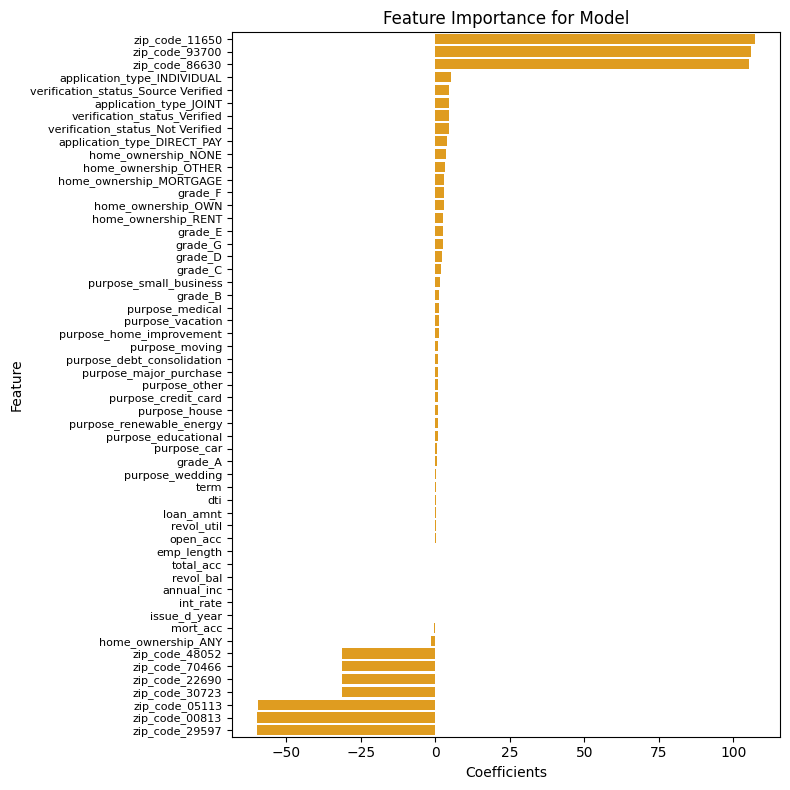

In [ ]:
feature_imp = pd.DataFrame({'Columns':X_train_final.columns, 'Coefficients':best_model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'],color='orange')
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Observation:

- Zip codes- 11650, 93700, 86630 signify strong positive relationship with the Loan Status
-  Whereas zip codes 29597,00813,05113 show strong negative relatioship with target variable
- It shows that features such as emp_length, total_acc, revol_bal, annual_inc, int_rate, issue_d_year show no contribution at all. These features should have been dropped for analysis

#ROC Curve & AUC

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It helps evaluate and compare different models by illustrating the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various classification thresholds.

The area under the ROC curve (AUC) is a commonly used metric to quantify the overall performance of a classifier.

A perfect classifier would have an AUC of 1, while a random classifier would have an AUC of 0.5. The higher the AUC value, the better the classifier's performance in distinguishing between positive and negative instances.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

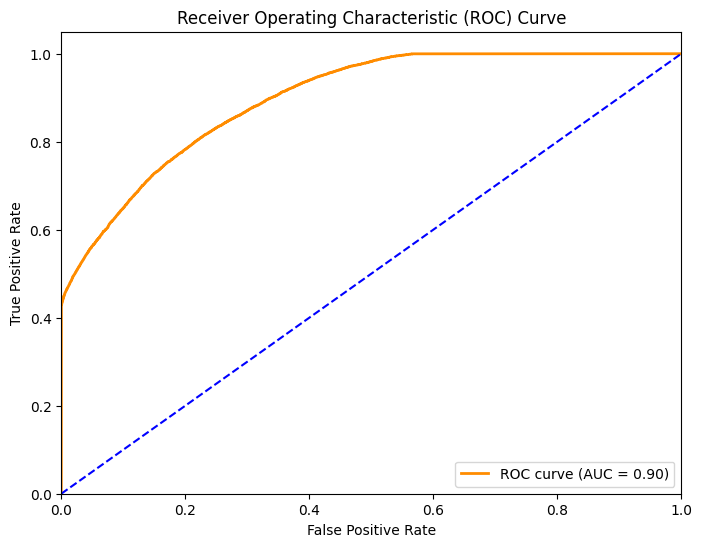

In [ ]:
# Make predictions on the test set
y_pred_proba = best_model.predict_proba(X_test_final)[:, 1]

# Compute ROC curve and ROC-AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

- AUC of 0.90 signifies that the model is able to discriminate well between the positive and the negative class.
- This can happen when the classifier performs well on the majority class instances, which dominate the dataset. As a result, the AUC may appear high, but the model may not effectively identify the minority class instances.

#Precision Recall Curve

The Precision-Recall (PR) curve is another graphical representation commonly used to evaluate the performance of a binary classification model. It provides insights into the trade-off between precision and recall at various classification thresholds.

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

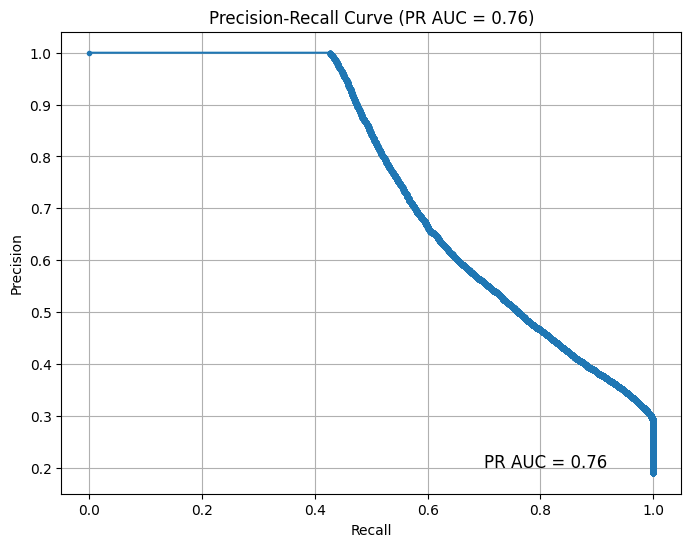

In [ ]:
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PR AUC = {:.2f})'.format(pr_auc))
plt.grid(True)

# Annotate the PR AUC value on the plot
plt.text(0.7, 0.2, 'PR AUC = {:.2f}'.format(pr_auc), fontsize=12)

plt.show()

- Interpretation of PR AUC: A PR AUC value of 0.76 indicates the area under the precision-recall curve. It represents the integral of precision-recall pairs across all possible decision thresholds. Essentially, it measures how well our classifier ranks positive samples with higher confidence scores compared to negative samples across all possible thresholds.
- A higher PR AUC value signifies better performance of the classifier in terms of balancing precision and recall.

#Insights

- Business Insights
- Questionnaire

- Approx. 80% of the loans are of 36 months duration
- Maximum Loans are from B grade followed by C,D,A
- Maximum Home Ownersip belong to MORTGAGE followed by RENT and OWN
- Fully Paid loans are almost 80% of the target variable loan_status
- Almost 90% of the applicants do not have derogatory Public Records
- Initial Listing Status of the loan is more in f category than w
- Almost 99% of the application types are individual
- Most of the applicants have got Mortage Account
- Almost 90% of the applicant have no Public Record Bankrupcies
- Almost 55% of the loans are taken against debt_consolidation followed by Credict card
- 2013 and 2014 were the years with maximum loans funding
- Percent share of default is much higher for long duration loans i.e 60 months
- Defaulters are highest for grade f and g and then decrease with grade. Sub-grade showing similar pattern
- Home Ownership: Charged-off % is high for None category followed by Rent, Own and Mortgage
- Surprisingly 100% defaulters observed for Zip codes 11650, 86630 and 93700. And zip codes with no defaulters at all are 00813, 05113, 29597
- pub_rec, pub_rec_bankruptcies, init_list_status and state have no impact
- In application type, Direct pay has maximum defaulters followed by individual and joint
- Applicants with mort_acc 0 have higher charged off % than ones with mort_acc category 1
- Applicants with small_business have high default rate followed by renewable energy and others
- No significant impact of employment length on loan repayments
- 2007 is the year with maximum percent of defaulters followed by 2015 and 2014
- Mean loan_amount,int_rate, dti, open_acc, revol_util is slightly higher for charged off
- Mean annual_inc is lower for charged off than fully paid
- The test score is slightly lower than both the training and validation scores but still close, indicating that the model generalizes reasonably well to unseen data.
- Precision for class 0: 0.92 means that out of all instances predicted as class 0, 92% of them were actually class 0.
- Precision for class 1: 0.58 means that out of all instances predicted as class 1, only 58% of them were actually class 1.
- Recall for class 0: 0.88 means that the model correctly identified 88% of all actual class 0 instances.
- Recall for class 1: 0.68 means that the model correctly identified 68% of all actual class 1 instances.
- F1-score for class 0: 0.90 is the harmonic mean of precision and recall for class 0.
- F1-score for class 1: 0.62 is the harmonic mean of precision and recall for class 1.
- Zip codes- 11650, 93700, 86630 signify strong positive relationship with the Loan Status
- Whereas zip codes 29597,00813,05113 show strong negative relatioship with target variable
- It shows that features such as emp_length, total_acc, revol_bal, annual_inc, int_rate, issue_d_year show no contribution at all.
- ROC Curve (AUC = 0.90) is observed
- Interpretation of PR AUC: A PR AUC value of 0.76 indicates the area under the precision-recall curve. It represents the integral of precision-recall pairs across all possible decision thresholds.

**Questionnaire**

1. What percentage of customers have fully paid their Loan Amount?

  **80.38%** of customers have fully paid up their loan

2. Comment about the correlation between Loan Amount and Installment features.

  They are **close to perfect positive correlation** with value close 1 i.e 0.9

3. The majority of people have home ownership as **Mortgage**.

4. People with grades ‘A’ are more likely to fully pay their loan. **True**

5. Name the top 2 afforded job titles.
  **Teacher and Manager**

6. Thinking from a bank's perspective, which metric should our primary focus be
on..
- ROC AUC
- Precision
- Recall
- F1 Score

  **Recall:** It measures the ability of the model to correctly identify all actual defaulters. High recall ensures that the bank catches as many risky borrowers as possible, thereby minimizing the number of approved loans that may default.

7. How does the gap in precision and recall affect the bank?

  **Financial Losses:**

  **False Positives (Low Precision)**: Approving loans to individuals who later default can result in financial losses for the bank. These non-performing assets (NPAs) not only reduce profitability but also tie up capital that could have been invested elsewhere.

  **False Negatives (Low Recall)**: Rejecting creditworthy applicants due to overly conservative risk assessment can lead to missed revenue opportunities. The bank loses out on potential interest income and customer relationships.

  **Reputation Damage:**

  False Positives: Approving loans to individuals who subsequently default can damage the bank's reputation. It may erode trust among customers and investors, affecting brand perception and market credibility.

  False Negatives: Rejecting creditworthy applicants unfairly can lead to dissatisfaction among customers. Negative word-of-mouth, social media backlash, and complaints to regulatory authorities can tarnish the bank's reputation.

8. Which were the features that heavily affected the outcome?

  **Zip Code followed by Application Type and Verification status**

9. Will the results be affected by geographical location?

  **Yes**, Zip code as part of geographical location highly affected the results

#Recommendations & Feedback Mechanism

**Risk Mitigation:**

  - **Segment-Based Strategy**: Focus on higher grades (A, B, C) for initial rollouts while continuously monitoring performance. As the model proves effective, gradually extend to lower grades (D, E, F, G) with cautious parameters.

  - **Loan Caps and Conditional Approvals**: Implement loan caps for high-risk segments and conditional approvals where additional guarantees or higher interest rates are applied.

  - **Geographical Risk Assessment**: Given the strong relationship between certain zip codes and default rates, incorporate geographical risk factors into the model. Focus on high-risk zip codes with stricter criteria.

**Enhancing Loan Approval Process:**

  - **Verification Process**: Strengthen the verification process for critical features like income, employment status, and home ownership to reduce misinformation.

  - **Real-Time Monitoring**: Implement real-time credit monitoring for borrowers to identify early signs of financial distress and intervene before defaults occur.

**Feedback Loop**

1. **Continuous Monitoring**:

  **Performance Metrics**: Continuously track key performance metrics such as precision, recall, F1-score, and AUC-ROC to evaluate model effectiveness.

  **Regular Audits**: Conduct periodic audits of approved and denied loans to assess the model's decisions against actual outcomes.

2. **Iterative Improvements**:

  **Model Retraining**: Regularly retrain the model with new data to capture changes in borrower behavior and economic conditions.
  
  **User Feedback**: Incorporate feedback from loan officers and customers to identify areas of improvement in the model and process.

3. **Dynamic Risk Adjustments**:

  **Economic Indicators**: Monitor macroeconomic indicators such as unemployment rates and economic growth to adjust lending criteria dynamically.

  **Anomaly Detection**: Use anomaly detection techniques to identify and investigate unusual patterns in loan applications and repayments.